In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()       # Will prompt you to select a file

Saving data.csv to data (8).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv'])) # Dataset is now stored in a Pandas Dataframe

# Exploratory Data Analysis

In [4]:
print("There are", data.shape[0], "rows and", data.shape[1], "columns in the dataset.")

There are 569 rows and 33 columns in the dataset.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The last column in the dataset contains all NA values, and so we remove it.

## Cleaning Data

In [6]:
data = data.drop(['Unnamed: 32'], axis = 1)
print("After data cleaning, there are", data.shape[0], "observations and", data.shape[1], "features in the dataset.")

After data cleaning, there are 569 observations and 32 features in the dataset.


In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

There are no features that contains NA values.


## Numerical Features: Descriptive Statistics

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Categorical Features: Descriptive Statistics

In [10]:
data.describe(include = 'O')

,diagnosis
count,569
unique,2
top,B
freq,357


## Feature Design

Getting features that have moderate to high correlation with Diagnosis. Then assigning it to new dataframe.


## Data Visualization


We are selecting the mean features, since the other features are highly related.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express
import seaborn
seaborn.set() 

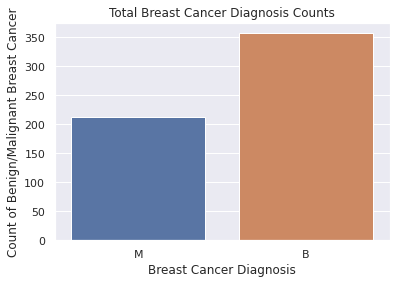

In [12]:
sns.countplot(data,x="diagnosis")

plt.xlabel("Breast Cancer Diagnosis")
plt.ylabel("Count of Benign/Malignant Breast Cancer")
plt.title("Total Breast Cancer Diagnosis Counts")

plt.show()

## Feature Scaling

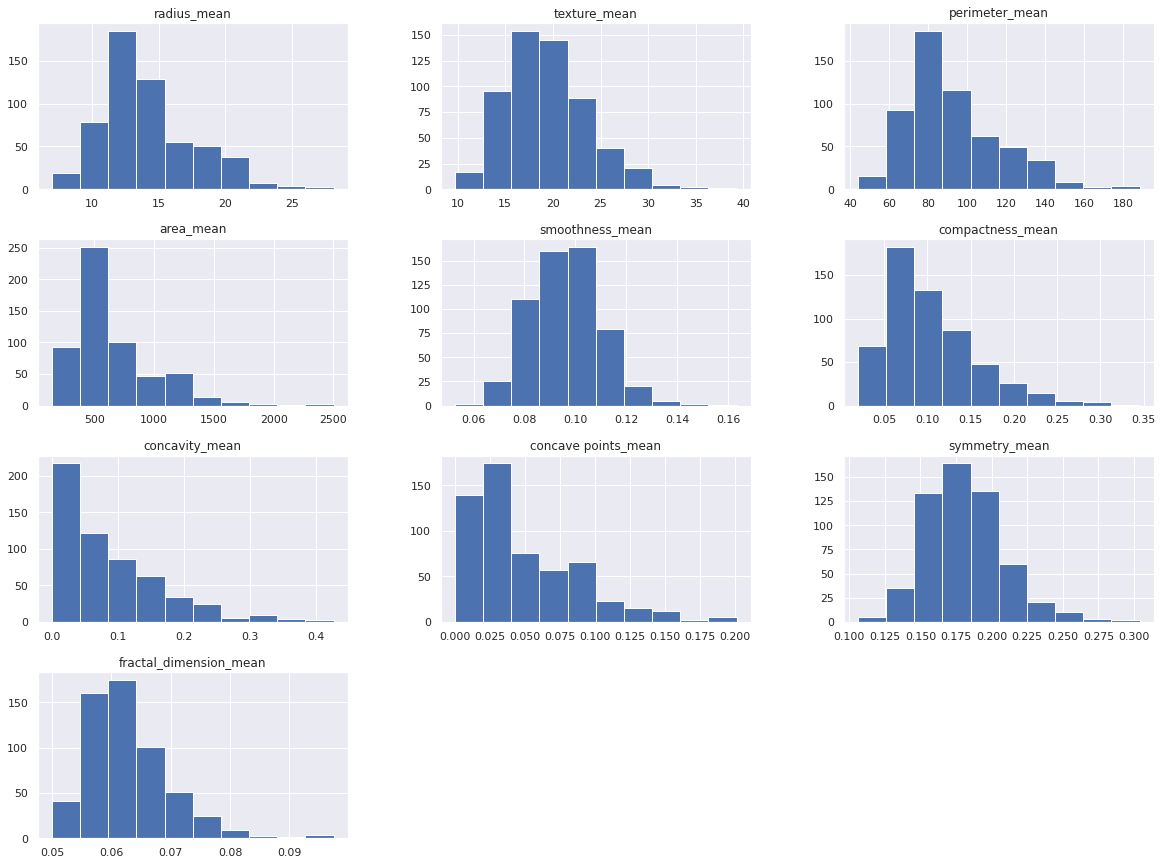

In [13]:
X = data.iloc[:, 2:12]
X.hist(figsize=(20, 15));

Most of the distributions are right-skewed, which indicates that not all features follow a standard normal distribution (mean=0, variance=1), which would present itself as a bell-shaped curve. Their scales also vary, which may cause features with higher scales/magnitudes  contributing more to the model training process. However, we want to ensure that all features are contributing equally to the model training process.

Feature scaling refers to the process of transforming the values of the features to a similar scale. This process is necessary for our SVM model, which is distance-based, so that features with high magnitudes do not dominate the distance calculations. 

In [14]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

In [15]:
mean_data = data.iloc[:, 2:12] # Each observation has 10 means corresponding to 10 main features (i.e. radius, texture, smoothness, etc.)

# STANDARDIZING MEAN
mapper = DataFrameMapper([(mean_data.columns, StandardScaler())])
scaled_features = mapper.fit_transform(mean_data.copy(), 10)
scaled_features_df = pd.DataFrame(scaled_features, index=mean_data.index, columns=mean_data.columns)

print(scaled_features_df.head(5))   

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  
0                2.255747  
1               -0.868652  
2       

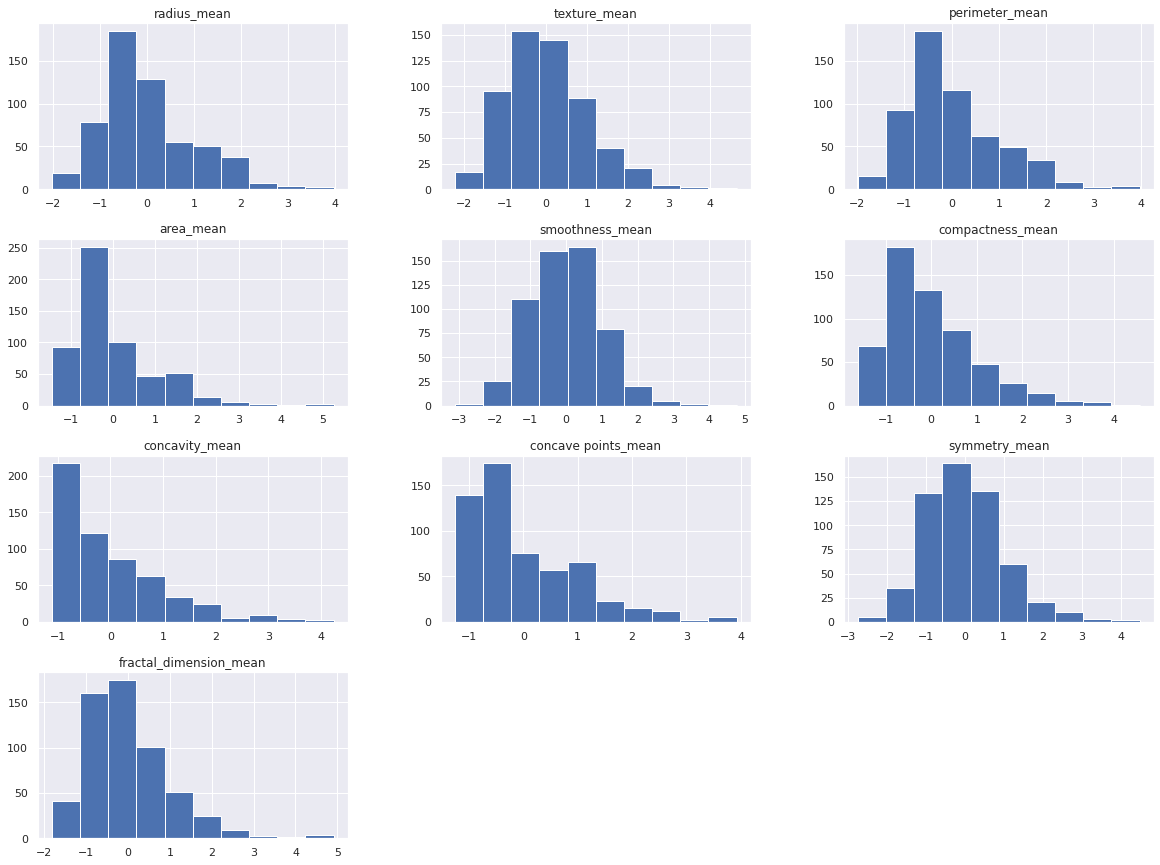

In [16]:
scaled_features_df.hist(figsize=(20, 15));

In [17]:
scaled_features_df  = pd.concat([data.iloc[:,0:2], scaled_features_df.iloc[:,:]], axis=1) # concatenate id, diagnosis with standardized means
scaled_features_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,926682,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,926954,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,927241,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


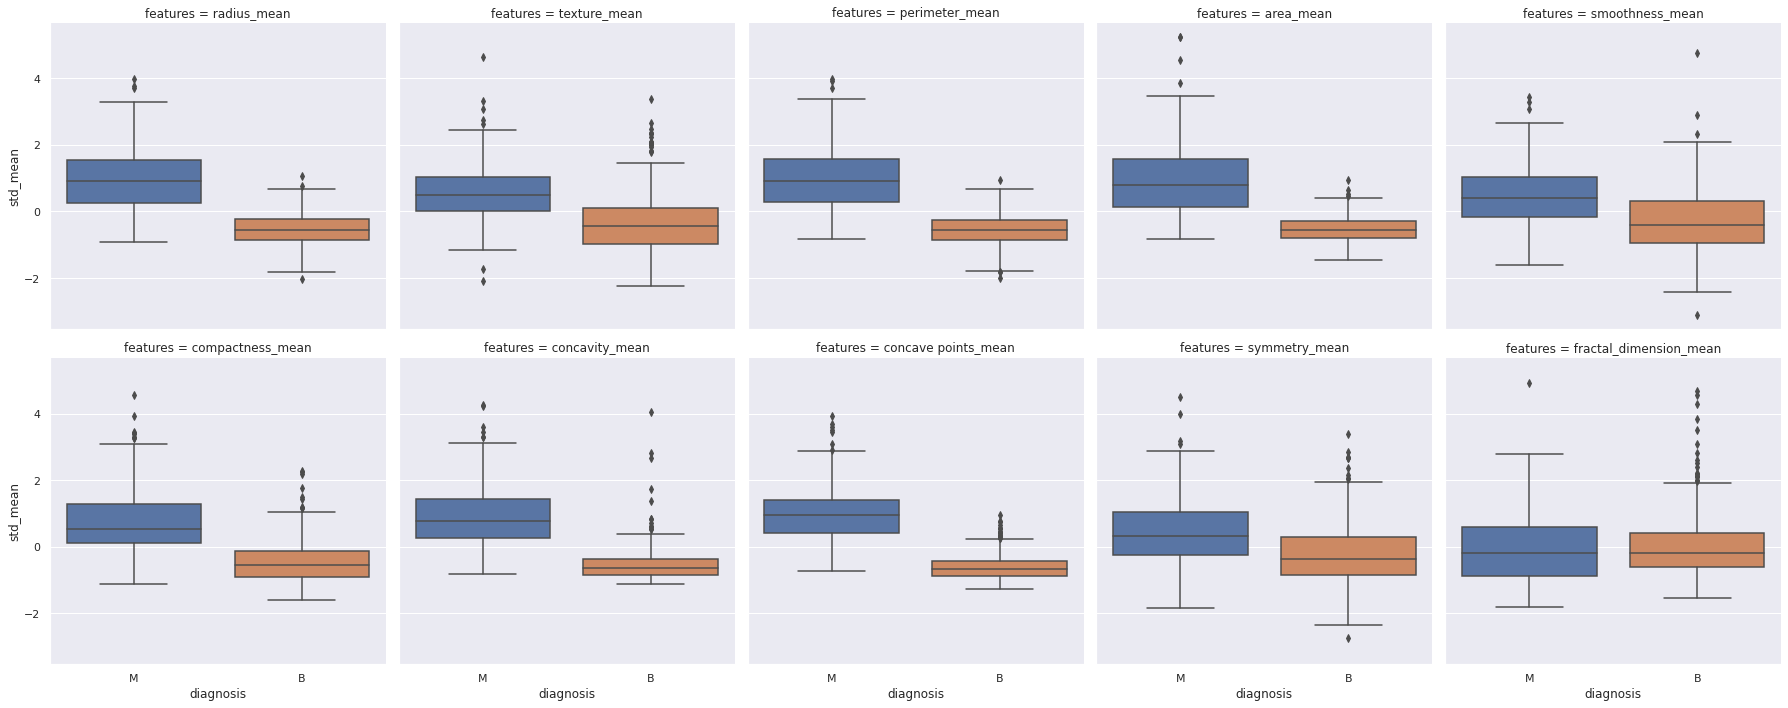

In [18]:
# Convert Standardized Data Frame from Wide Format to Long Format
data_melt = pd.melt(scaled_features_df, id_vars = ["id", "diagnosis"], var_name = "features", value_name = "std_mean")
data_melt.head(5)


# Boxplot for Each Main Feature Mean (i.e. radius_mean, texture_mean, smoothness_mean, etc.)
g = sns.catplot(data= data_melt, x = 'diagnosis', y = 'std_mean', col = 'features', kind = 'box', col_wrap = 5)  

After feature scaling using standardization, each boxplot of the mean features are scaled to have zero mean and unit variance, mitigating the effects of features with extreme values, which can affect the model's performance.

In [ ]:
temp = pd.concat([data.iloc[:,1], mean_data.iloc[:,:]], axis=1)
sns.pairplot(temp, hue="diagnosis")
plt.plot()

From the pairplot, strong linear positive correlations are seen between the features, such as perimeter mean and radius mean, suggesting that the model can be affected negatively. There may be overfitting, unstable or inaccurate model coefficients, and become more difficult to interpret feature importance. 

To counter this, SVM will include principle component analysis, which can mitigate issues by utilizing dimensionality reduction, improving our performance accuracy and generalization when comparing our model to the test data. Since the data is relatively small, PCA is not necessarily needed, but is good practice. 

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")
cols = list(mean_data.columns)
# print(cols)

sns.heatmap(data[cols].corr(), annot=True);

From the heatmap, we can also view strong correlations between variables, suggesting multicollinearity.

## Feature Design

We will transform categorical diagnosis features into 0/1 to prepare for classification modeling.

In [ ]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis']) 
data['diagnosis'].head()

# Reassign Numerical Labels to Diagnosis Column
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])

data['diagnosis'].value_counts()

#scaled_features_df

## Model Exploration

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data to train and test the model (.8,.2) --> 80% assigned to train, 20% assigned to validate/test
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size = 0.2, random_state=10)

## SVM

Spliting once into test and train, but better if test,train,val

We only split data into test and train set as the cross-validation strategy is used to estimate the model's performance on new, unseen data and select the best hyperparameters when we train with SVC (default 5-K Fold cross validation). 

####Data Preprocessing

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

####Feature Scaling for SVM

In [ ]:
# Perform feature scaling on the training data . Train the machine learning model on the scaled training data.
scaler = StandardScaler()  
Xtr =  scaler.fit_transform(Xtr)

# Use the same scaling transformation to transform the testing data.
Xva = scaler.transform(Xva)
# Evaluate the performance of the model on the scaled testing data.

####Model

Our model will include a soft margin classifier, since we want more robustness in regards to outliers and handle possible non-linear separable data. 

Here, choosing linear kernel SVM for linearly separable data first, seeing that the training set is very large/has plenty of features. We will utilize the hinge loss function with the linear kernel svm for regularization.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

cancer = svm.SVC(kernel='linear', class_weight='balanced', C = 0.05) # Linear Kernel w/ parameter
#Train model
cancer.fit(Xtr, Ytr)

#Predict response 
Y_pred_train = cancer.predict(Xtr)
Y_pred_test = cancer.predict(Xva)

# Model Accuracy
train_score = metrics.accuracy_score(Ytr, Y_pred_train)*100
test_score = metrics.accuracy_score(Yva, Y_pred_test)*100

print(cancer)
print("Train Accuracy:",round(train_score,2),"%")
print("Test Accuracy:",round(test_score,2),"%")

In [ ]:
import time
kernels = ['linear', 'poly', 'rbf']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_model = None
best_kernel = None
best_score = 0

starttime= time.process_time()

for kernel in kernels:
  for C in C_values:
        for gamma in gamma_values:
            svc = svm.SVC(kernel=kernel, class_weight='balanced', C=C, gamma=gamma,probability=True)
            svc.fit(Xtr, Ytr)
            y_pred_val = svc.predict(Xva)
            score = metrics.accuracy_score(Yva, y_pred_val)*100
            if score > best_score:
                best_model = svc
                best_kernel = kernel
                best_score = score     #got the best hyperparameters/model from training and then also tested with test data

# Evaluate the best model on the test set (overall)
y_pred_test = best_model.predict(Xva) #insert X test set in our best model to get y_pred
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

print("Best parameters:",best_model)
print("Kernel:", best_kernel)
# print("Validation accuracy:", round(best_score, 2), "%")
# print("Test accuracy:", round(test_score, 2), "%")


# Evaluate the best model on the test set
y_pred_test = best_model.predict(Xva)
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

svm_best = best_model
svm_best.fit(Xtr, Ytr)

y_pred_svm = svm_best.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 5-fold Cross Validation with SVM is" ,(totaltime),'seconds')
print("Average Perfomance Measure of SVM Model using General Cross Validation")
# svm_cm = confusion_matrix(Yva,y_pred_svm)
# print("Confusion Matrix generated from best svm model with optimal hyperparameters:")
# print(confusion_matrix(Yva,y_pred_svm),"\n")
print("Classification Report")
print(classification_report(Yva,y_pred_svm))

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("Recall Score: {:.2f}".format(recall))
# print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("Precision Score: {:.2f}".format(precision))
# print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("Accuracy: {:.2f}".format(accuracy))
# print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

In [ ]:
#Classification Report (Training) To see Overfitting
svm_best.fit(Xtr,Ytr)
y_train_pred = svm_best.predict(Xtr)
print("Classification Report (Train)")
print(classification_report(Ytr,y_train_pred))

#### Hyperparameter Tuning and Cross Validation

To obtain the optimal hyperparameters to train a model into robutness, and to also perform cross-validation we will implement the GridSearchCV method, the RandomizedSearchCV, and then Bayesian optimization. With each increasing technique, each method is more efficient in higher dimensions, decreasing runtime and time complexity while finding the optimal hyperparameters.

Choosing 5-fold cross validation currently.

In [ ]:
# %pip install bayesian-optimization==1.4.1
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

starttime= time.process_time()

# Define the SVM model to be optimized
def svm_cv(C, gamma):
    svm = SVC(C=C, gamma=gamma, kernel='rbf',probability=True)
    scores = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
    return scores.mean()

# Define the search space for the hyperparameters
param_bounds = {'C': (0.1, 100), 'gamma': (0.01, 10)}

# Define the Bayesian Optimization object and run the optimization
svm_bayesopt = BayesianOptimization(svm_cv, param_bounds,verbose=0)
svm_bayesopt.maximize(init_points=5, n_iter=20)

# # Print the best hyperparameters found by Bayesian Optimization
svm_bayesopt.maximize(init_points=5, n_iter=20)

# Print the best hyperparameters found by Bayesian Optimization
best_params = svm_bayesopt.max['params']
print(f"Best parameters: {best_params}")

svm_bestB = SVC(**best_params,probability=True)
svm_bestB.fit(Xtr, Ytr)

y_pred_svm = svm_bestB.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 5-fold Cross Validation with SVM is" ,(totaltime),'seconds')

print("Average Perfomance Measure of SVM Model using Bayesian Optimization")

print("Classification Report")
print(classification_report(Yva,y_pred_svm))

#On Test Data
# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("Recall Score: {:.2f}".format(recall))
# print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("Precision Score: {:.2f}".format(precision))
# print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("Accuracy: {:.2f}".format(accuracy))
# print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

In [ ]:
#Classification Report (Training) To see Overfitting
svm_bestB.fit(Xtr,Ytr)
y_train_pred_2 = svm_bestB.predict(Xtr)
print("Classification Report (Train)")
print(classification_report(Ytr,y_train_pred_2))

#### Calibrated Classification of the SVM Model

Although we are able to detect the accuracy of the model overall with the test set, we would also like to look at the estimated class probabilities, the confidence of the diagnosis of benign or malignant.
This is especially important since having a strong prediction/certainty of the diagnosis will greatly impact the patient. We would like a strong positive correlation between the computed probability and proportion of positive "malign" tumor.

We will calibrate the model using the Platt's method,which is suitable for smaller data and recheck accuracy. However, there may be a tradeoff between accuracy and calibration.

In [ ]:
#First Best model
from sklearn.metrics import roc_curve, auc

y_pred_svm_cal = svm_best.predict_proba(Xva)[:, 1] # fix typo here
svm_cm = confusion_matrix(Yva, best_model.predict(Xva)) # use best_model here

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Yva, y_pred_svm_cal) # use y_pred_svm_cal here

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('First Best Model ROC Curve')

# Calculate the AUC score
auc_score = auc(fpr, tpr)
print('AUC: %.3f' % auc_score)

In [ ]:
#Just for Bayesian rn

from sklearn.metrics import roc_curve, auc

y_pred_svm_cal_2 = svm_bestB.predict_proba(Xva)[:, 1] # fix typo here
svm_cm_2 = confusion_matrix(Yva, svm_bestB.predict(Xva)) # use best_model here

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values
fpr_2, tpr_2, thresholds_2 = roc_curve(Yva, y_pred_svm_cal_2) # use y_pred_svm_cal here

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_2, tpr_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Second Bayesian Method Best Model ROC Curve')

# Calculate the AUC score
auc_score = auc(fpr_2, tpr_2)
print('AUC: %.3f' % auc_score)

##Possible Improvement SVM

### PCA (Change to eda, seeing what variables most variance/importance, with plot)
With multicollinearity seen between our features, PCA may be able to improve accuracy through decreasing dimensionality. Principle Component Analysis (PCA), is an unsupervised technique which reduces dimensionality by projecting principle components from orginal data. Principle components are the directions in the data, capturing the maximum variance. From the linear combinations of the data, the first principle component captures the most variance of the original data, and the following captures the variance left over. The number of principle components are able to be chosen, and we are left with the reduced dataset.

2 Principle components will be chosen, as it would be easier to visualize in a scatterplot, showing the separation between the classes (Malignant vs Benign).
Since there are so few features, this might not improve the performance of the model.

In [ ]:
#Graphing Split
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mean_features)
pca_X = pca.transform(mean_features)

# plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
sns.scatterplot(x=pca_X[:,0],y=pca_X[:,1], hue=mean_features['diagnosis'])

plt.title("PCA")
plt.xlabel("First Principal Component")
plt.xlabel("Second Principal Component")
plt.show()



In [ ]:
#Then use new dataframe for model training, finding optimal parameters.

## Random Forest

The dataset is imbalanced, in which 63% of the observations belong to class 0 (benign), or the majority class, and 37% of the observations belong to class 1 (malignant), or the minority class. As a result, a random forest model will most likely select features that are better at predicting the majority class, during the tree construction process. While the model may accurately predict instances in the majority class, it will perform poorly in predicting instances in the minority class. 


To address this issue, we will use Stratified K-fold cross validation, and GridSearchCV combined. Stratified K-fold cross validation  is essentially K-fold cross validation, except that it ensures that within each fold, the proportion of each class is roughly equal. We will also use GridSearchCV for hyperparameter tuning which will search over a range of hyperparameters to find the combination that yields the best performance on the validation set. Using these two methods together will allow us to make accurate hyperparameter choices.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Split the data to train and test the model (.8,.2) --> 80% assigned to train, 20% assigned to validate/test
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size = 0.2, random_state=10)

num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200], # number of decision trees in forest
              'max_features': range(1,11), # maximum number of features to consider when splitting a node in each decision tree in the random forest.
              'max_depth': range(2, 15), # maximum depth of the tree
              'min_samples_leaf': range(1,3), # minimum number of samples to include in a leaf node
              'criterion':['gini','entropy']}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

gcv = GridSearchCV(rf, param_grid, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(Xtr, Ytr)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

best_params = gcv.best_params_
best_score = gcv.best_score_

starttime= time.process_time()
# Fit the best random forest model obtained from GridSearchCV
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
best_rf.fit(Xtr, Ytr)

# predictions on test data generated from best random forest model
y_pred = best_rf.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by Random Forest Classifier is" ,(totaltime),'seconds')

# Confusion Matrix
cm = confusion_matrix(Yva, y_pred)
print("Confusion Matrix generated from best random forest model with optimal hyperparameters: \n", cm)

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred)
print("\n Recall Score on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(recall))
print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred)
print("\n Precision Score on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(precision))
print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = best_rf.score(Xva, Yva)
print("\n Accuracy on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(accuracy))
print("Out of all the tumors in the dataset, {:.2f}% of them were correctly classified by the model.".format(accuracy*100))

#### Cross Validation

Even though we already used GridSearchCV to determine the best hyperparameter choices for the random forest model, this does not ensure that our model will generalize well to unseen data. 

We should still use additional cross validation to estimate the performance of our model on unseen data. We will still use stratified k-fold cross validation to also account for the imbalanced data.

In the context of medical diagnosis, it is important to prioritize high precision and high recall. F1 score is a model performance measure that captures both precision and recall, and so we want this number to be as close to 1 as possible, which would represent perfect precision and recall.

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

starttime= time.process_time()

for fold_i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Already created instance of random forest classifer with best hyperparameters, just need to fit 
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    # Performance measures after each iteration of K-fold cross validation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = (2 * (precision * recall) / (precision + recall))

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print("FOLD: ", fold_i+1)
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1_score))
    print("\n")

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 10-fold Cross Validation with Random Forest Classifier is" ,(totaltime),'seconds')

print("Average Peformance Measures of Random Forest Model Using {}-fold Cross Validation".format(num_folds))
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1_scores))


These average performance measures are estimates of the model's performance on new, unseen data. The random forest model with hyperparameter choices generated from GridSearchCV is expected to perform well on unseen data, with high precision and high recall, as indicated by the F1 score of 0.91.